In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
import seaborn as sns

# Lab Exercise CH2-1: 
data of example:

In [2]:
df=pd.DataFrame([[1,1],[2,4],[5,7],[3,4],[5,2],[2,1],[2,1]],index=range(9,16),columns=['w1','w2'])
print(df)

    w1  w2
9    1   1
10   2   4
11   5   7
12   3   4
13   5   2
14   2   1
15   2   1


# 2-1.1
redo p(x|ω1) and p(x|ω2)

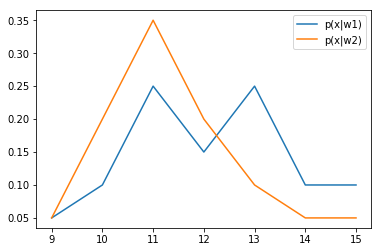

p(x|w1):
9     0.05
10    0.10
11    0.25
12    0.15
13    0.25
14    0.10
15    0.10
dtype: float64
p(x|w2):
9     0.05
10    0.20
11    0.35
12    0.20
13    0.10
14    0.05
15    0.05
dtype: float64


In [3]:
pw1=0.5
pw2=0.5
pw1_x=df['w1']/(df['w1']+df['w2'])
pw2_x=df['w2']/(df['w1']+df['w2'])
px=(df['w1']+df['w2'])/40
px_w1=pw1_x*px/pw1
px_w2=pw2_x*px/pw2

px_w1.plot(label='p(x|w1)')
px_w2.plot(label='p(x|w2)')
plt.legend()
plt.show()
print('p(x|w1):')
print(px_w1)
print('p(x|w2):')
print(px_w2)

# 2-1.2
draw the figure of p(w1|x),p(w2|x)

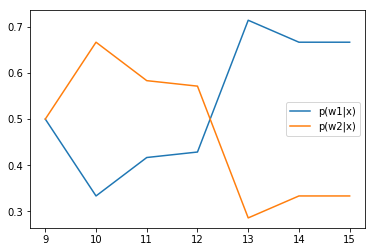

p(w1|x):
9     0.500000
10    0.333333
11    0.416667
12    0.428571
13    0.714286
14    0.666667
15    0.666667
dtype: float64
p(w2|x):
9     0.500000
10    0.666667
11    0.583333
12    0.571429
13    0.285714
14    0.333333
15    0.333333
dtype: float64


In [4]:
pw1_x.plot(label='p(w1|x)')
pw2_x.plot(label='p(w2|x)')
plt.legend()
plt.show()
print('p(w1|x):')
print(pw1_x)
print('p(w2|x):')
print(pw2_x)

# Lab Exercise CH2-2:
plot p(x|w1)*p(w1) and p(x|w1)*p(w1)

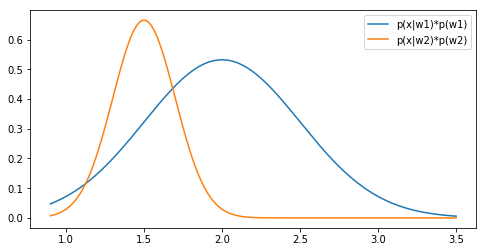

In [5]:
plt.figure(figsize=(8,4))
u1,u2=2,1.5
sig1,sig2=0.5,0.2
pw1,pw2=2/3,1/3
x = np.linspace(u2 - 3*sig2, u1 + 3*sig1, 1000)
y1 = pw1*np.exp(-(x - u1) ** 2 /(2* sig1 **2))/(math.sqrt(2*math.pi)*sig1) 
y2 = pw2*np.exp(-(x - u2) ** 2 /(2* sig2 **2))/(math.sqrt(2*math.pi)*sig2)
plt.plot(x,y1,label='p(x|w1)*p(w1)')
plt.plot(x,y2,label='p(x|w2)*p(w2)')
plt.legend()
plt.show()

# Decide:
**Let p(x|w1)p(w1)=p(x|w2)p(w2),we can get the x.**
# **Result:**
1)when **x<1.12558256**,we may decide w1;

2)when **1.12558256<x<1.68394125**,we may decide w2;

3)when **x>1.68394125**,we may decide w1.

In [6]:
from scipy.optimize import fsolve
def func(x):
    return np.log(pw1*np.exp(-(x-u1)**2/(2* sig1 **2))/(math.sqrt(2*math.pi)*sig1))-np.log(pw2*np.exp(-(x - u2) ** 2 /(2* sig2 **2))/(math.sqrt(2*math.pi)*sig2))
r1 = fsolve(func,0)
r2 = fsolve(func,2)
print(r1,r2)

[1.12558256] [1.68394125]


# Lab Exercise CH2-3:
plot λ11*p(x|w1)*p(w1)+λ12*p(x|w2)*p(w2) and λ21*p(x|w1)*p(w1)+λ22*p(x|w2)*p(w2)

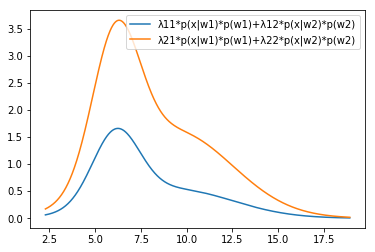

In [7]:
l=[[1,2],[3,4]]
b1,b2,b3,b4=u1-3*sig1,u2-3*sig2,u1+3*sig1,u2+3*sig2
x = np.linspace(l[0][0]*b1+l[0][1]*b2,l[1][0]*b3+l[1][1]*b4,1000)
z1=l[0][0]*y1+l[0][1]*y2
z2=l[1][0]*y1+l[1][1]*y2
plt.plot(x,z1,label="λ11*p(x|w1)*p(w1)+λ12*p(x|w2)*p(w2)")
plt.plot(x,z2,label="λ21*p(x|w1)*p(w1)+λ22*p(x|w2)*p(w2)")
plt.legend()
plt.show()

# Decide:
**We may decide w1,because R(α1|x)<R(α2|x) is always true.**

In [8]:
def func(x):
    return np.log(2*pw1*np.exp(-(x-u1)**2/(2* sig1 **2))/(math.sqrt(2*math.pi)*sig1))-np.log(-2*pw2*np.exp(-(x - u2) ** 2 /(2* sig2 **2))/(math.sqrt(2*math.pi)*sig2))
r = fsolve(func,0,maxfev=10000)
print(r)

[0.]


E:\program\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
E:\program\anaconda\anaconda\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


# Lab Exercise 1 (50%) Random number generation
(a)Generate 1D,2D,3D numbers.Each has 1000 samples.The rand function generate uniform 0-1 numbers.

In [9]:
data1D = np.random.uniform(size=1000)
data2D = np.random.uniform(size=[2,1000])
data3D = np.random.uniform(size=[3,1000])

(b)Visualize the generated samples using a scatter plot. 

data1D:(There are too many samples,and the scatter plot seems to be a line.)

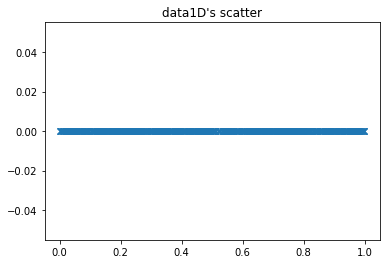

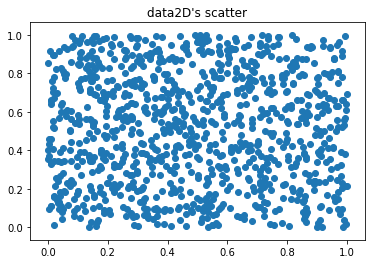

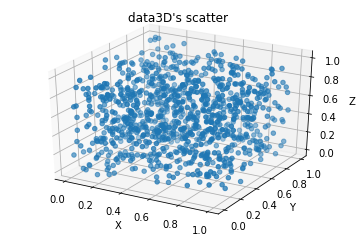

In [10]:
plt.plot(data1D,[0]*1000,"x")
plt.title("data1D's scatter")
plt.show()

x,y = data2D[0], data2D[1]
plt.scatter(x,y)
plt.title("data2D's scatter")
plt.show()

x, y, z = data3D[0], data3D[1], data3D[2]
ax = plt.subplot(111, projection='3d')# 创建一个三维的绘图工程
ax.scatter(x,y,z)
ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("data3D's scatter")
plt.show()

(c) Compute the histogram of the three streams.And get there pdfs.

(d) Visualize the pdf’s of the three streams.

data1D's histogram: [20 22 23 14 19 17 27 14 17 19 22 26 27 17 16 19 18 23 17 23 13 21 18 22
 27 17 14 25 17 14 13 24 22 15 20 19 26 18 20 26 16 13 26 22 21 21 20 19
 27 24]


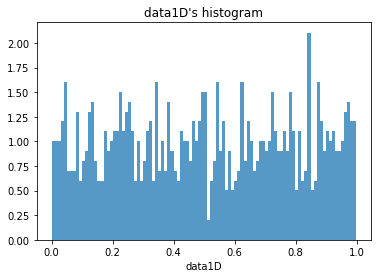

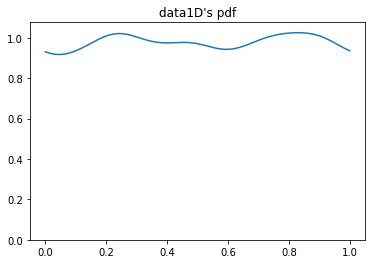

In [11]:
z=np.histogram(data1D,bins=50)
print("data1D's histogram:",z[0])

plt.hist(data1D, bins=100, density=True,stacked=True,alpha=0.75)
plt.xlabel('data1D')
plt.title("data1D's histogram")
plt.show()


sns.kdeplot(data1D,cut=0);
plt.title("data1D's pdf")
plt.show()

I get the 2D histogram data as follows, each of which represents the frequency in the current range.

data2D's histogram: [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [2. 1. 0. ... 0. 0. 1.]]


E:\program\anaconda\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\program\anaconda\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


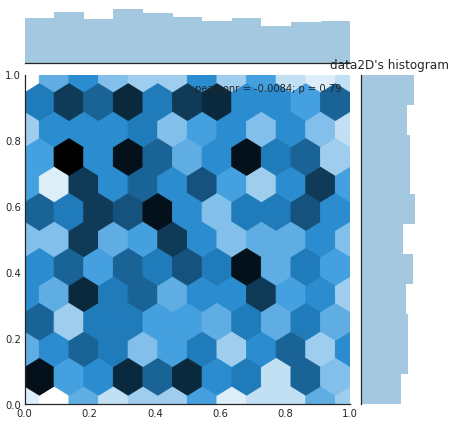

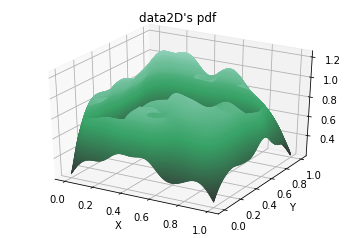

In [12]:
data = pd.DataFrame(data2D.T, columns=["X", "Y"])

z=np.histogram2d(data["X"],data["Y"],bins=50)
print("data2D's histogram:",z[0])

with sns.axes_style("white"):
    sns.jointplot(x=data2D[0], y=data2D[1], kind="hex",bins=50);
plt.title("data2D's histogram")
plt.show()

ax = plt.subplot(projection='3d')
sns.kdeplot(data["X"],data["Y"],n_levels=1000,cut=0)
plt.title("data2D's pdf")
plt.show()

In [13]:
df=pd.DataFrame(data3D[0].T,columns=["X"])
df["Y"]=pd.DataFrame(data3D[1].T)
df["Z"]=pd.DataFrame(data3D[2].T)
H, edges = np.histogramdd(df.values, bins = (10, 10, 10))
print("data3D's histogram:",H)

data3D's histogram: [[[2. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 0. 0. 1. 3. 0. 1. 1. 1.]
  [1. 1. 2. 1. 1. 1. 0. 1. 1. 0.]
  [0. 2. 0. 3. 0. 4. 2. 1. 0. 1.]
  [0. 0. 1. 3. 0. 2. 1. 0. 0. 2.]
  [1. 2. 3. 2. 0. 3. 1. 0. 3. 2.]
  [1. 1. 2. 2. 0. 3. 4. 0. 2. 0.]
  [3. 0. 3. 0. 1. 0. 0. 3. 1. 1.]
  [1. 1. 2. 1. 2. 2. 1. 3. 1. 0.]
  [2. 0. 0. 2. 1. 2. 2. 0. 1. 4.]]

 [[2. 0. 3. 0. 0. 2. 0. 2. 3. 1.]
  [0. 1. 2. 3. 1. 2. 1. 2. 0. 0.]
  [6. 0. 2. 0. 0. 0. 0. 1. 1. 0.]
  [3. 0. 0. 2. 2. 0. 0. 1. 0. 1.]
  [2. 2. 1. 4. 2. 0. 2. 2. 0. 1.]
  [0. 0. 3. 1. 2. 1. 1. 0. 1. 1.]
  [2. 1. 2. 0. 2. 1. 1. 0. 2. 0.]
  [2. 0. 0. 1. 1. 0. 1. 1. 2. 0.]
  [0. 3. 1. 2. 0. 2. 0. 2. 0. 1.]
  [0. 1. 1. 0. 0. 2. 1. 2. 3. 2.]]

 [[4. 0. 1. 3. 1. 0. 1. 2. 2. 5.]
  [1. 1. 1. 1. 5. 1. 2. 0. 0. 1.]
  [1. 0. 0. 0. 0. 1. 1. 1. 2. 0.]
  [0. 1. 2. 1. 1. 2. 1. 4. 0. 0.]
  [2. 0. 0. 1. 0. 1. 1. 2. 2. 1.]
  [1. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
  [0. 0. 0. 1. 4. 3. 3. 1. 0. 1.]
  [1. 2. 0. 1. 0. 2. 1. 0. 1. 1.]
  [1. 1. 2. 0. 4. 1. 1. 

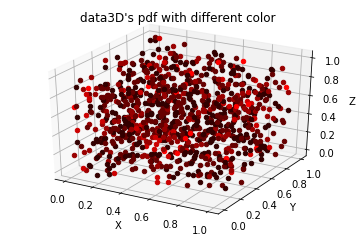

In [14]:
ax = plt.subplot(111, projection='3d')# 创建一个三维的绘图工程
x, y, z = data3D[0], data3D[1], data3D[2]
H=H.flatten()
for i in range(1000):
    red=int(((H[i]+1)*255/5).item())
    if red>255:
        red=255
    color="#"+hex(red).replace('0x','')+"0000"
    ax.scatter(x[i],y[i],z[i],c=color)

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("data3D's pdf with different color")
plt.show()